In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score , mean_squared_error , mean_absolute_error
from math import sqrt
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [30]:
stock = pd.read_csv('S&P500_Stock_Data.csv')
stock.head()

,Interest Rates,Employment,S&P 500 Price
0,1.943859,55.413571,2206.680582
1,2.258229,59.546305,2486.474488
2,2.215863,57.414687,2405.868337
3,1.977960,49.908353,2140.434475
4,2.437723,52.035492,2411.275663


In [31]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Interest Rates  1000 non-null   float64
 1   Employment      1000 non-null   float64
 2   S&P 500 Price   1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


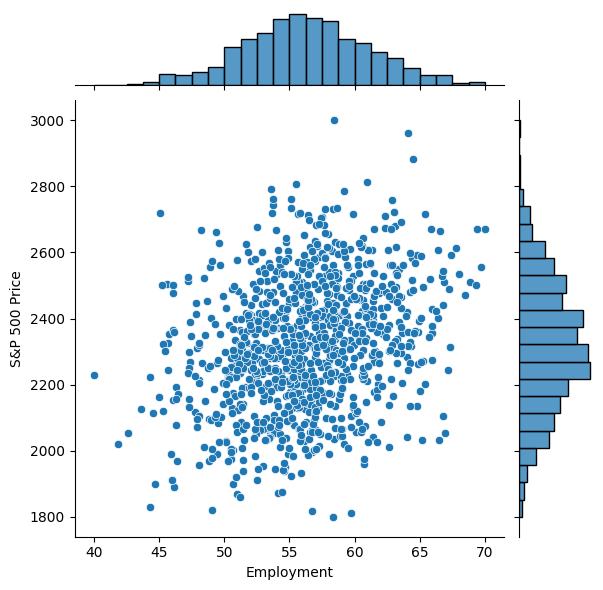

In [32]:
sns.jointplot(x='Employment',y='S&P 500 Price',data=stock)

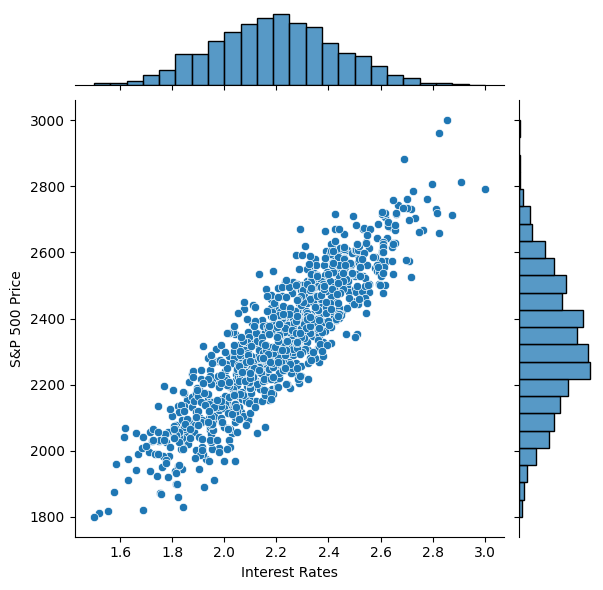

In [33]:
sns.jointplot(x='Interest Rates',y='S&P 500 Price',data=stock)

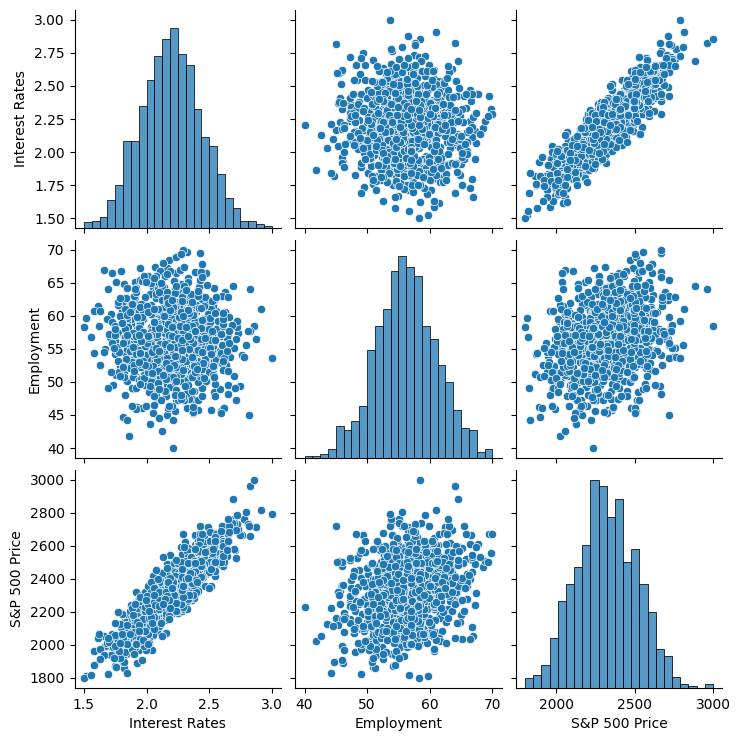

In [34]:
sns.pairplot(stock)

In [35]:
stock

,Interest Rates,Employment,S&P 500 Price
0,1.943859,55.413571,2206.680582
1,2.258229,59.546305,2486.474488
2,2.215863,57.414687,2405.868337
3,1.977960,49.908353,2140.434475
4,2.437723,52.035492,2411.275663
...,...,...,...
995,2.528420,52.390828,2578.699184
996,2.643571,54.626204,2573.865933
997,2.009644,57.004357,2004.911218
998,2.201656,62.447790,2344.098981


In [36]:
X = stock[['Interest Rates','Employment']]
y = stock['S&P 500 Price']

In [37]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [38]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [39]:
print(f"Co-efficient : {regressor.coef_}")
print(f"Intercept : {regressor.intercept_}")

Co-efficient : [727.55257618  12.31742267]
Intercept : 30.904978320754708


In [40]:
y_pred = regressor.predict(X_test)
y_pred

array([2347.30276662, 2781.90069913, 2223.74711475, 2423.49257445,
       2355.12330869, 2374.08048779, 2329.55538434, 2356.17493901,
       2117.39857615, 2456.6846145 , 2631.6167912 , 2579.0045487 ,
       2244.51646191, 2419.39897206, 2422.84146189, 2519.44643315,
       2207.44154099, 2411.46368773, 2159.74810706, 1912.83325962,
       2262.60768348, 2162.36711208, 2386.1934299 , 2055.38352011,
       2559.99908493, 2176.08507511, 2506.34644189, 2425.53038581,
       2402.59597985, 2594.11342154, 2261.71679881, 2551.36521689,
       2511.14710133, 2218.42677599, 2347.5357749 , 2515.73848169,
       2491.15308621, 2026.87973436, 2315.16631804, 2358.12026104,
       2318.67206938, 2198.93593721, 2444.33103414, 2377.8233159 ,
       2367.8168758 , 2281.49692053, 2154.73174875, 2175.40430694,
       2547.06459932, 2321.63904581, 2308.58610565, 2503.41876455,
       2170.63794653, 2277.16537622, 2055.43952733, 2480.22251629,
       2076.55252301, 2033.10017607, 2102.63911855, 2163.03815

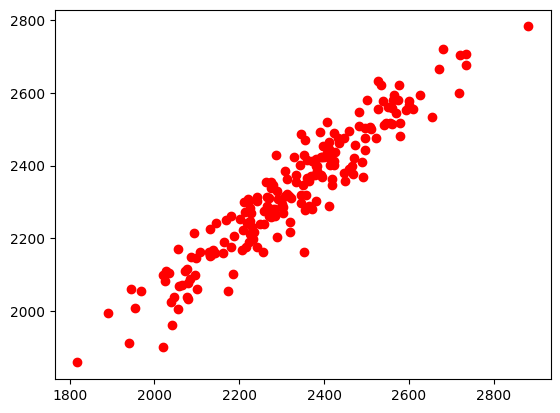

In [41]:
plt.scatter(y_test,y_pred,color='red')


In [42]:
k = X_test.shape[1]
n = len(X_test)
RMSE = float(format(np.sqrt(mean_squared_error(y_test,y_pred)),'.3f'))
print(f"RMSE : {RMSE}")
MSE = mean_squared_error(y_test,y_pred)
print(f"MSE : {MSE}")
MAE = mean_absolute_error(y_test,y_pred)
print(f"MAE : {MAE}")
r2 = r2_score(y_test,y_pred)
print(f"R2_Score : {r2}")
adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)
print(f"Adjusted R2 : {adj_r2}")
MAPE = np.mean(np.abs((y_test-y_pred)/y_test)) * 100
print(f"Adjusted R2 : {MAPE}")

RMSE : 59.276
MSE : 3513.6046173635777
MAE : 47.226784702743835
R2_Score : 0.8958792642873612
Adjusted R2 : 0.8948222009806339
Adjusted R2 : 2.0510825028163997


In [45]:
X_surf , y_surf = np.meshgrid(np.linspace(stock['Interest Rates'].min(),stock['Interest Rates'].max(),100),np.linspace(stock['Employment'].min(),stock['Employment'].max(),100))

In [49]:
onlyX = pd.DataFrame({'Interest Rates':X_surf.ravel(),'Employment':y_surf.ravel()})

In [52]:
onlyX.shape

(10000, 2)

In [53]:
fittedY=regressor.predict(onlyX)
fittedY.shape

(10000,)

In [55]:
fittedY = fittedY.reshape(X_surf.shape)
fittedY.shape

(100, 100)

Text(0.5, 0, 'Stock index price')

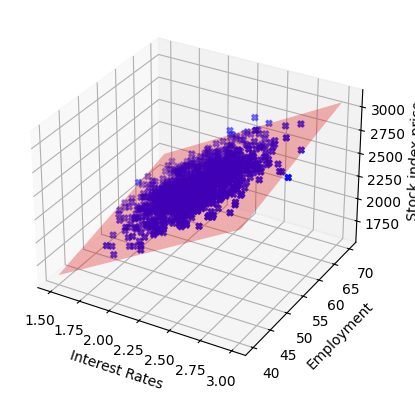

In [56]:
fig = plt.figure()
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(stock['Interest Rates'],stock['Employment'],stock['S&P 500 Price'], color = 'blue', marker='X')
ax.plot_surface(X_surf, y_surf , fittedY , color='red', alpha=0.3)
ax.set_xlabel('Interest Rates')
ax.set_ylabel('Employment')
ax.set_zlabel('Stock index price')

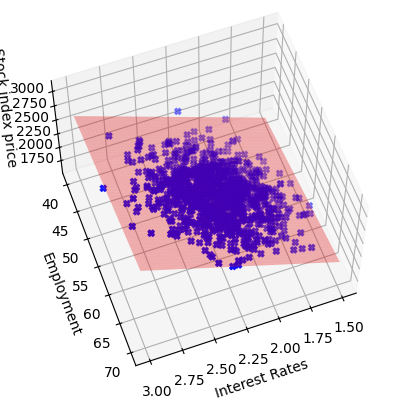

In [64]:
fig = plt.figure()
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(stock['Interest Rates'],stock['Employment'],stock['S&P 500 Price'], color = 'blue', marker='X')
ax.plot_surface(X_surf, y_surf , fittedY , color='red', alpha=0.3)
ax.set_xlabel('Interest Rates')
ax.set_ylabel('Employment')
ax.set_zlabel('Stock index price')
ax.view_init(60,70)
plt.show()